In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir

In [2]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Dropout

In [3]:
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [4]:
df1 = pd.read_csv('./MovementAAL/dataset/MovementAAL_RSS_1.csv')
df2 = pd.read_csv('./MovementAAL/dataset/MovementAAL_RSS_2.csv')

In [5]:
df1.head()

,#RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4
0,-0.90476,-0.48,0.28571,0.30
1,-0.57143,-0.32,0.14286,0.30
2,-0.38095,-0.28,-0.14286,0.35
3,-0.28571,-0.20,-0.47619,0.35
4,-0.14286,-0.20,0.14286,-0.20


In [6]:
df2.head()

,#RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4
0,-0.57143,-0.20,0.71429,0.50
1,-0.76190,-0.48,0.76190,-0.25
2,-0.85714,-0.60,0.85714,0.55
3,-0.76190,-0.40,0.71429,0.60
4,-0.76190,-0.84,0.85714,0.45


In [7]:
df1.shape

(27, 4)

In [8]:
df2.shape

(26, 4)

In [9]:
path = './MovementAAL/dataset/MovementAAL_RSS_'
sequences = list()
for i in range(1,315):
    file_path = path + str(i) + '.csv'
    print(file_path)
    df = pd.read_csv(file_path, header=0)
    values = df.values
    sequences.append(values)

./MovementAAL/dataset/MovementAAL_RSS_1.csv
./MovementAAL/dataset/MovementAAL_RSS_2.csv
./MovementAAL/dataset/MovementAAL_RSS_3.csv
./MovementAAL/dataset/MovementAAL_RSS_4.csv
./MovementAAL/dataset/MovementAAL_RSS_5.csv
./MovementAAL/dataset/MovementAAL_RSS_6.csv
./MovementAAL/dataset/MovementAAL_RSS_7.csv
./MovementAAL/dataset/MovementAAL_RSS_8.csv
./MovementAAL/dataset/MovementAAL_RSS_9.csv
./MovementAAL/dataset/MovementAAL_RSS_10.csv
./MovementAAL/dataset/MovementAAL_RSS_11.csv
./MovementAAL/dataset/MovementAAL_RSS_12.csv
./MovementAAL/dataset/MovementAAL_RSS_13.csv
./MovementAAL/dataset/MovementAAL_RSS_14.csv
./MovementAAL/dataset/MovementAAL_RSS_15.csv
./MovementAAL/dataset/MovementAAL_RSS_16.csv
./MovementAAL/dataset/MovementAAL_RSS_17.csv
./MovementAAL/dataset/MovementAAL_RSS_18.csv
./MovementAAL/dataset/MovementAAL_RSS_19.csv
./MovementAAL/dataset/MovementAAL_RSS_20.csv
./MovementAAL/dataset/MovementAAL_RSS_21.csv
./MovementAAL/dataset/MovementAAL_RSS_22.csv
./MovementAAL/datas

./MovementAAL/dataset/MovementAAL_RSS_239.csv
./MovementAAL/dataset/MovementAAL_RSS_240.csv
./MovementAAL/dataset/MovementAAL_RSS_241.csv
./MovementAAL/dataset/MovementAAL_RSS_242.csv
./MovementAAL/dataset/MovementAAL_RSS_243.csv
./MovementAAL/dataset/MovementAAL_RSS_244.csv
./MovementAAL/dataset/MovementAAL_RSS_245.csv
./MovementAAL/dataset/MovementAAL_RSS_246.csv
./MovementAAL/dataset/MovementAAL_RSS_247.csv
./MovementAAL/dataset/MovementAAL_RSS_248.csv
./MovementAAL/dataset/MovementAAL_RSS_249.csv
./MovementAAL/dataset/MovementAAL_RSS_250.csv
./MovementAAL/dataset/MovementAAL_RSS_251.csv
./MovementAAL/dataset/MovementAAL_RSS_252.csv
./MovementAAL/dataset/MovementAAL_RSS_253.csv
./MovementAAL/dataset/MovementAAL_RSS_254.csv
./MovementAAL/dataset/MovementAAL_RSS_255.csv
./MovementAAL/dataset/MovementAAL_RSS_256.csv
./MovementAAL/dataset/MovementAAL_RSS_257.csv
./MovementAAL/dataset/MovementAAL_RSS_258.csv
./MovementAAL/dataset/MovementAAL_RSS_259.csv
./MovementAAL/dataset/MovementAAL_

In [10]:
len(sequences)

314

In [11]:
targets = pd.read_csv('./MovementAAL/dataset/MovementAAL_target.csv')
targets = targets.values[:,1]
targets

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [12]:
#sequences[313]

In [13]:
groups = pd.read_csv('./MovementAAL/groups/MovementAAL_DatasetGroup.csv', header=0)
groups = groups.values[:,1]

In [14]:
#groups

### PRE-PROCESSING

In [15]:
len_sequences = []
for one_seq in sequences:
    len_sequences.append(len(one_seq))
pd.Series(len_sequences).describe()

count    314.000000
mean      42.028662
std       16.185303
min       19.000000
25%       26.000000
50%       41.000000
75%       56.000000
max      129.000000
dtype: float64

In [16]:
#Padding the sequence with the values in last row to max length
to_pad = 129
new_seq = []
for one_seq in sequences:
    len_one_seq = len(one_seq)
    last_val = one_seq[-1]
    n = to_pad - len_one_seq
   
    to_concat = np.repeat(one_seq[-1], n).reshape(4, n).transpose()
    new_one_seq = np.concatenate([one_seq, to_concat])
    new_seq.append(new_one_seq)
final_seq = np.stack(new_seq)

#truncate the sequence to length 60
from keras.preprocessing import sequence
seq_len = 60
final_seq=sequence.pad_sequences(final_seq, maxlen=seq_len, padding='post', dtype='float', truncating='post')

In [17]:
final_seq.shape

(314, 60, 4)

In [18]:
#final_seq[0]

In [19]:
train = [final_seq[i] for i in range(len(groups)) if (groups[i]==2)]
validation = [final_seq[i] for i in range(len(groups)) if groups[i]==1]
test = [final_seq[i] for i in range(len(groups)) if groups[i]==3]

train_target = [targets[i] for i in range(len(groups)) if (groups[i]==2)]
validation_target = [targets[i] for i in range(len(groups)) if groups[i]==1]
test_target = [targets[i] for i in range(len(groups)) if groups[i]==3]

In [20]:
train = np.array(train)
validation = np.array(validation)
test = np.array(test)

train_target = np.array(train_target)
train_target = (train_target+1)/2

validation_target = np.array(validation_target)
validation_target = (validation_target+1)/2

test_target = np.array(test_target)
test_target = (test_target+1)/2

In [21]:
train.shape, validation.shape, test.shape

((106, 60, 4), (104, 60, 4), (104, 60, 4))

In [22]:
seq_len

60

# TRY1: Building time series classification model

In [23]:
model = Sequential()
model.add(LSTM(256, input_shape=(seq_len, 4)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation="sigmoid"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               267264    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               25700     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 293,065
Trainable params: 293,065
Non-trainable params: 0
_________________________________________________________________


In [25]:
adam = Adam(lr=0.01)
chk = ModelCheckpoint('best_model', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(train, train_target, epochs=200, batch_size=32, callbacks=[chk], validation_data=(validation,validation_target))

Epoch 1/200
4/4 [==============================] - ETA: 0s - loss: 0.7320 - accuracy: 0.5283
Epoch 00001: val_accuracy improved from -inf to 0.47115, saving model to best_model
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: best_model\assets
4/4 [==============================] - 8s 2s/step - loss: 0.7320 - accuracy: 0.5283 - val_loss: 2.0097 - val_accuracy: 0.4712
Epoch 2/200
4/4 [==============================] - ETA: 0s - loss: 1.1590 - accuracy: 0.5094
Epoch 00002: val_accuracy did not improve from 0.47115
4/4 [==============================] - 0s 84ms/step - loss: 1.1590 - accuracy: 0.5094 - val_loss: 0.6936 - val_accuracy: 0.4615
Epoch 3/200
4/4 [==============================] - ETA: 0s - loss: 0.6965 - accuracy: 0.4717
Epoch 00003: val_accuracy improved from 0.47115 to 0.55769, saving model to best_model
INFO:tensorflow:Assets written to: best_model\assets
4/4 [==============================] - 8s 2s/step - lo

Epoch 28/200
4/4 [==============================] - ETA: 0s - loss: 0.6959 - accuracy: 0.4906
Epoch 00028: val_accuracy did not improve from 0.70192
4/4 [==============================] - 0s 84ms/step - loss: 0.6959 - accuracy: 0.4906 - val_loss: 0.6850 - val_accuracy: 0.5192
Epoch 29/200
4/4 [==============================] - ETA: 0s - loss: 0.7080 - accuracy: 0.5283
Epoch 00029: val_accuracy did not improve from 0.70192
4/4 [==============================] - 0s 85ms/step - loss: 0.7080 - accuracy: 0.5283 - val_loss: 0.6830 - val_accuracy: 0.6538
Epoch 30/200
4/4 [==============================] - ETA: 0s - loss: 0.6877 - accuracy: 0.5566
Epoch 00030: val_accuracy did not improve from 0.70192
4/4 [==============================] - 0s 84ms/step - loss: 0.6877 - accuracy: 0.5566 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 31/200
4/4 [==============================] - ETA: 0s - loss: 0.6909 - accuracy: 0.5189
Epoch 00031: val_accuracy did not improve from 0.70192
4/4 [===============

Epoch 58/200
4/4 [==============================] - ETA: 0s - loss: 0.7312 - accuracy: 0.4906
Epoch 00058: val_accuracy did not improve from 0.70192
4/4 [==============================] - 0s 86ms/step - loss: 0.7312 - accuracy: 0.4906 - val_loss: 0.6653 - val_accuracy: 0.6731
Epoch 59/200
4/4 [==============================] - ETA: 0s - loss: 0.6585 - accuracy: 0.6226
Epoch 00059: val_accuracy did not improve from 0.70192
4/4 [==============================] - 0s 98ms/step - loss: 0.6585 - accuracy: 0.6226 - val_loss: 0.6971 - val_accuracy: 0.5000
Epoch 60/200
4/4 [==============================] - ETA: 0s - loss: 0.6758 - accuracy: 0.5283
Epoch 00060: val_accuracy did not improve from 0.70192
4/4 [==============================] - 0s 95ms/step - loss: 0.6758 - accuracy: 0.5283 - val_loss: 0.6683 - val_accuracy: 0.5577
Epoch 61/200
4/4 [==============================] - ETA: 0s - loss: 0.6667 - accuracy: 0.6226
Epoch 00061: val_accuracy improved from 0.70192 to 0.72115, saving model to

4/4 [==============================] - ETA: 0s - loss: 0.5682 - accuracy: 0.6981
Epoch 00087: val_accuracy did not improve from 0.72115
4/4 [==============================] - 0s 95ms/step - loss: 0.5682 - accuracy: 0.6981 - val_loss: 0.8629 - val_accuracy: 0.5769
Epoch 88/200
4/4 [==============================] - ETA: 0s - loss: 0.5130 - accuracy: 0.7642
Epoch 00088: val_accuracy did not improve from 0.72115
4/4 [==============================] - 0s 98ms/step - loss: 0.5130 - accuracy: 0.7642 - val_loss: 0.9851 - val_accuracy: 0.6058
Epoch 89/200
4/4 [==============================] - ETA: 0s - loss: 0.5074 - accuracy: 0.7358
Epoch 00089: val_accuracy did not improve from 0.72115
4/4 [==============================] - 0s 95ms/step - loss: 0.5074 - accuracy: 0.7358 - val_loss: 1.3396 - val_accuracy: 0.6154
Epoch 90/200
4/4 [==============================] - ETA: 0s - loss: 0.4998 - accuracy: 0.7830
Epoch 00090: val_accuracy did not improve from 0.72115
4/4 [============================

Epoch 117/200
4/4 [==============================] - ETA: 0s - loss: 0.5568 - accuracy: 0.7170
Epoch 00117: val_accuracy did not improve from 0.72115
4/4 [==============================] - 0s 95ms/step - loss: 0.5568 - accuracy: 0.7170 - val_loss: 0.6169 - val_accuracy: 0.6827
Epoch 118/200
4/4 [==============================] - ETA: 0s - loss: 0.5055 - accuracy: 0.7925
Epoch 00118: val_accuracy did not improve from 0.72115
4/4 [==============================] - 0s 96ms/step - loss: 0.5055 - accuracy: 0.7925 - val_loss: 0.8491 - val_accuracy: 0.6250
Epoch 119/200
4/4 [==============================] - ETA: 0s - loss: 0.5616 - accuracy: 0.7264
Epoch 00119: val_accuracy did not improve from 0.72115
4/4 [==============================] - 0s 96ms/step - loss: 0.5616 - accuracy: 0.7264 - val_loss: 0.6244 - val_accuracy: 0.6827
Epoch 120/200
4/4 [==============================] - ETA: 0s - loss: 0.5115 - accuracy: 0.7547
Epoch 00120: val_accuracy did not improve from 0.72115
4/4 [===========

Epoch 00146: val_accuracy did not improve from 0.72115
4/4 [==============================] - 0s 96ms/step - loss: 0.4451 - accuracy: 0.7830 - val_loss: 0.6648 - val_accuracy: 0.6538
Epoch 147/200
4/4 [==============================] - ETA: 0s - loss: 0.4684 - accuracy: 0.7642
Epoch 00147: val_accuracy did not improve from 0.72115
4/4 [==============================] - 0s 95ms/step - loss: 0.4684 - accuracy: 0.7642 - val_loss: 0.7613 - val_accuracy: 0.6250
Epoch 148/200
4/4 [==============================] - ETA: 0s - loss: 0.4337 - accuracy: 0.7170
Epoch 00148: val_accuracy did not improve from 0.72115
4/4 [==============================] - 0s 95ms/step - loss: 0.4337 - accuracy: 0.7170 - val_loss: 0.8952 - val_accuracy: 0.6442
Epoch 149/200
4/4 [==============================] - ETA: 0s - loss: 0.3666 - accuracy: 0.8302
Epoch 00149: val_accuracy did not improve from 0.72115
4/4 [==============================] - 0s 94ms/step - loss: 0.3666 - accuracy: 0.8302 - val_loss: 1.3581 - val_

Epoch 176/200
4/4 [==============================] - ETA: 0s - loss: 0.5712 - accuracy: 0.7358
Epoch 00176: val_accuracy did not improve from 0.72115
4/4 [==============================] - 0s 92ms/step - loss: 0.5712 - accuracy: 0.7358 - val_loss: 1.4871 - val_accuracy: 0.6058
Epoch 177/200
4/4 [==============================] - ETA: 0s - loss: 0.5586 - accuracy: 0.7170
Epoch 00177: val_accuracy did not improve from 0.72115
4/4 [==============================] - 0s 91ms/step - loss: 0.5586 - accuracy: 0.7170 - val_loss: 1.9124 - val_accuracy: 0.6154
Epoch 178/200
4/4 [==============================] - ETA: 0s - loss: 0.5649 - accuracy: 0.6981
Epoch 00178: val_accuracy did not improve from 0.72115
4/4 [==============================] - 0s 94ms/step - loss: 0.5649 - accuracy: 0.6981 - val_loss: 1.3076 - val_accuracy: 0.5769
Epoch 179/200
4/4 [==============================] - ETA: 0s - loss: 0.4568 - accuracy: 0.7547
Epoch 00179: val_accuracy did not improve from 0.72115
4/4 [===========

In [26]:
#loading the model and checking accuracy on the test data
model = load_model('best_model')

from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(test)
accuracy_score(test_target, test_preds)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.5961538461538461

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(test_target, test_preds)

array([[21, 29],
       [13, 41]], dtype=int64)

In [29]:
test[0].shape

(60, 4)

In [30]:
model.save("TRY1.h5")

# TRY1_1: Building time series classification model

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

In [32]:
early_stop=EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

In [33]:
model = tf.keras.Sequential()
model.add(
    tf.keras.layers.Bidirectional(
      tf.keras.layers.LSTM(
          units=256, 
          input_shape=(seq_len, 4), kernel_regularizer=l2(0.1)
      )
    )
)
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])


# from tensorflow.keras.optimizers import Adam
# opt=Adam(lr=0.1)

# model = Sequential()
# model.add(LSTM(256, input_shape=(seq_len, 4), return_sequences=True))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
# model.add(LSTM(128, return_sequences=True))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
# model.add(Dropout(0.3))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dropout(0.3))
# model.add(Dense(1))

# model.compile(loss=tf.losses.MeanSquaredError(), optimizer=opt,metrics=[tf.metrics.MeanAbsoluteError()])
#model.summary()

In [34]:
model.fit(train, train_target, epochs=600, batch_size=64, callbacks=[early_stop], validation_data=(validation,validation_target))

Epoch 1/600
2/2 [==============================] - 1s 462ms/step - loss: 2.2625 - acc: 0.4906 - val_loss: 2.1623 - val_acc: 0.6442
Epoch 2/600
2/2 [==============================] - 0s 186ms/step - loss: 2.0959 - acc: 0.8491 - val_loss: 2.0446 - val_acc: 0.5288
Epoch 3/600
2/2 [==============================] - 0s 179ms/step - loss: 1.9215 - acc: 0.8679 - val_loss: 1.9701 - val_acc: 0.5096
Epoch 4/600
2/2 [==============================] - 0s 189ms/step - loss: 1.7540 - acc: 0.7925 - val_loss: 2.0226 - val_acc: 0.5192
Epoch 5/600
2/2 [==============================] - 0s 182ms/step - loss: 1.5689 - acc: 0.8113 - val_loss: 2.2668 - val_acc: 0.6058
Epoch 6/600
2/2 [==============================] - 0s 179ms/step - loss: 1.4492 - acc: 0.8491 - val_loss: 3.0252 - val_acc: 0.5673
Epoch 7/600
2/2 [==============================] - 0s 183ms/step - loss: 1.3682 - acc: 0.8585 - val_loss: 2.6153 - val_acc: 0.5673
Epoch 8/600
2/2 [==============================] - 0s 181ms/step - loss: 1.2001 - a

In [35]:
model.save("MODEL1_1.h5")

<AxesSubplot:>

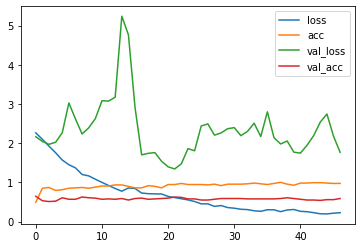

In [36]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(test_target, test_preds)

array([[21, 29],
       [13, 41]], dtype=int64)

# TRY_2

In [39]:
seq_len=60
n_features=4
n_outputs=1
model = Sequential()
model.add(LSTM(256, input_shape=(seq_len,n_features)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               267264    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 293,065
Trainable params: 293,065
Non-trainable params: 0
_________________________________________________________________


In [40]:
verbose, epochs, batch_size = 1, 500, 20
adam = Adam(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
# fit network
model.fit(train, train_target, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(validation, validation_target))
# evaluate model
_,accuracy = model.evaluate(test, test_target, batch_size=batch_size, verbose=0)
print(accuracy)

Epoch 1/500
6/6 [==============================] - 1s 180ms/step - loss: 0.7064 - accuracy: 0.6132 - val_loss: 1.1210 - val_accuracy: 0.5000
Epoch 2/500
6/6 [==============================] - 0s 64ms/step - loss: 0.7879 - accuracy: 0.5566 - val_loss: 0.6982 - val_accuracy: 0.5769
Epoch 3/500
6/6 [==============================] - 0s 63ms/step - loss: 1.1349 - accuracy: 0.4528 - val_loss: 0.7748 - val_accuracy: 0.5385
Epoch 4/500
6/6 [==============================] - 0s 63ms/step - loss: 0.7444 - accuracy: 0.5849 - val_loss: 0.8462 - val_accuracy: 0.5000
Epoch 5/500
6/6 [==============================] - 0s 63ms/step - loss: 0.8611 - accuracy: 0.5377 - val_loss: 0.8959 - val_accuracy: 0.4904
Epoch 6/500
6/6 [==============================] - 0s 68ms/step - loss: 0.8434 - accuracy: 0.4811 - val_loss: 0.7392 - val_accuracy: 0.5096
Epoch 7/500
6/6 [==============================] - 0s 71ms/step - loss: 0.7261 - accuracy: 0.5283 - val_loss: 0.8168 - val_accuracy: 0.5000
Epoch 8/500
6/6 [==

6/6 [==============================] - 0s 71ms/step - loss: 0.3967 - accuracy: 0.8019 - val_loss: 1.2005 - val_accuracy: 0.5673
Epoch 60/500
6/6 [==============================] - 0s 69ms/step - loss: 0.3659 - accuracy: 0.8208 - val_loss: 1.4311 - val_accuracy: 0.5577
Epoch 61/500
6/6 [==============================] - 0s 71ms/step - loss: 0.3713 - accuracy: 0.7830 - val_loss: 1.3858 - val_accuracy: 0.5769
Epoch 62/500
6/6 [==============================] - 0s 71ms/step - loss: 0.3964 - accuracy: 0.8396 - val_loss: 1.8539 - val_accuracy: 0.5288
Epoch 63/500
6/6 [==============================] - 0s 71ms/step - loss: 0.4225 - accuracy: 0.8491 - val_loss: 1.6780 - val_accuracy: 0.5385
Epoch 64/500
6/6 [==============================] - 0s 70ms/step - loss: 0.3891 - accuracy: 0.8585 - val_loss: 1.4935 - val_accuracy: 0.5577
Epoch 65/500
6/6 [==============================] - 0s 72ms/step - loss: 0.3317 - accuracy: 0.8396 - val_loss: 1.6245 - val_accuracy: 0.5577
Epoch 66/500
6/6 [========

6/6 [==============================] - 0s 73ms/step - loss: 0.3082 - accuracy: 0.8679 - val_loss: 2.7995 - val_accuracy: 0.5481
Epoch 118/500
6/6 [==============================] - 0s 73ms/step - loss: 0.2484 - accuracy: 0.8868 - val_loss: 3.0434 - val_accuracy: 0.5481
Epoch 119/500
6/6 [==============================] - 0s 71ms/step - loss: 0.3356 - accuracy: 0.8302 - val_loss: 3.1064 - val_accuracy: 0.5481
Epoch 120/500
6/6 [==============================] - 0s 73ms/step - loss: 0.2913 - accuracy: 0.8396 - val_loss: 2.5809 - val_accuracy: 0.6058
Epoch 121/500
6/6 [==============================] - 0s 70ms/step - loss: 0.3493 - accuracy: 0.8679 - val_loss: 2.6532 - val_accuracy: 0.5673
Epoch 122/500
6/6 [==============================] - 0s 73ms/step - loss: 0.4387 - accuracy: 0.7925 - val_loss: 1.6634 - val_accuracy: 0.5096
Epoch 123/500
6/6 [==============================] - 0s 71ms/step - loss: 0.3719 - accuracy: 0.8396 - val_loss: 0.8976 - val_accuracy: 0.5577
Epoch 124/500
6/6 [=

Epoch 175/500
6/6 [==============================] - 0s 72ms/step - loss: 0.5799 - accuracy: 0.6792 - val_loss: 0.8952 - val_accuracy: 0.5000
Epoch 176/500
6/6 [==============================] - 0s 72ms/step - loss: 0.6073 - accuracy: 0.6132 - val_loss: 0.8977 - val_accuracy: 0.4712
Epoch 177/500
6/6 [==============================] - 0s 72ms/step - loss: 0.5676 - accuracy: 0.6509 - val_loss: 0.9786 - val_accuracy: 0.5385
Epoch 178/500
6/6 [==============================] - 0s 72ms/step - loss: 0.5820 - accuracy: 0.6698 - val_loss: 0.9030 - val_accuracy: 0.5481
Epoch 179/500
6/6 [==============================] - 0s 72ms/step - loss: 0.5973 - accuracy: 0.7925 - val_loss: 0.9745 - val_accuracy: 0.5096
Epoch 180/500
6/6 [==============================] - 0s 73ms/step - loss: 0.5203 - accuracy: 0.7358 - val_loss: 1.1667 - val_accuracy: 0.5673
Epoch 181/500
6/6 [==============================] - 0s 71ms/step - loss: 0.5180 - accuracy: 0.7358 - val_loss: 0.8842 - val_accuracy: 0.5385
Epoch 

6/6 [==============================] - 0s 73ms/step - loss: 0.0772 - accuracy: 0.9623 - val_loss: 2.0069 - val_accuracy: 0.5385
Epoch 233/500
6/6 [==============================] - 0s 74ms/step - loss: 0.1258 - accuracy: 0.9528 - val_loss: 2.2215 - val_accuracy: 0.5288
Epoch 234/500
6/6 [==============================] - 0s 72ms/step - loss: 0.0619 - accuracy: 0.9906 - val_loss: 2.4487 - val_accuracy: 0.5192
Epoch 235/500
6/6 [==============================] - 0s 74ms/step - loss: 0.0418 - accuracy: 1.0000 - val_loss: 2.6374 - val_accuracy: 0.5385
Epoch 236/500
6/6 [==============================] - 0s 74ms/step - loss: 0.0443 - accuracy: 0.9811 - val_loss: 2.8513 - val_accuracy: 0.5288
Epoch 237/500
6/6 [==============================] - 0s 74ms/step - loss: 0.1288 - accuracy: 0.9717 - val_loss: 2.8785 - val_accuracy: 0.5288
Epoch 238/500
6/6 [==============================] - 0s 73ms/step - loss: 0.0570 - accuracy: 0.9906 - val_loss: 2.9562 - val_accuracy: 0.5096
Epoch 239/500
6/6 [=

Epoch 290/500
6/6 [==============================] - 0s 72ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 4.1207 - val_accuracy: 0.5577
Epoch 291/500
6/6 [==============================] - 0s 73ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 4.0823 - val_accuracy: 0.5673
Epoch 292/500
6/6 [==============================] - 0s 72ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.9908 - val_accuracy: 0.5577
Epoch 293/500
6/6 [==============================] - 0s 72ms/step - loss: 3.9184e-04 - accuracy: 1.0000 - val_loss: 3.9486 - val_accuracy: 0.5865
Epoch 294/500
6/6 [==============================] - 0s 73ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.9466 - val_accuracy: 0.5865
Epoch 295/500
6/6 [==============================] - 0s 72ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 3.9404 - val_accuracy: 0.5865
Epoch 296/500
6/6 [==============================] - 0s 74ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 3.9542 - val_accuracy: 0.5865
Ep

6/6 [==============================] - 0s 73ms/step - loss: 0.2597 - accuracy: 0.9434 - val_loss: 1.5325 - val_accuracy: 0.6154
Epoch 348/500
6/6 [==============================] - 0s 73ms/step - loss: 0.2634 - accuracy: 0.9245 - val_loss: 1.4777 - val_accuracy: 0.6250
Epoch 349/500
6/6 [==============================] - 0s 72ms/step - loss: 0.1912 - accuracy: 0.9434 - val_loss: 1.4229 - val_accuracy: 0.6058
Epoch 350/500
6/6 [==============================] - 0s 74ms/step - loss: 0.1750 - accuracy: 0.9245 - val_loss: 1.6779 - val_accuracy: 0.5673
Epoch 351/500
6/6 [==============================] - 0s 72ms/step - loss: 0.2001 - accuracy: 0.9245 - val_loss: 1.7429 - val_accuracy: 0.5769
Epoch 352/500
6/6 [==============================] - 0s 72ms/step - loss: 0.1588 - accuracy: 0.9623 - val_loss: 1.7120 - val_accuracy: 0.5673
Epoch 353/500
6/6 [==============================] - 0s 72ms/step - loss: 0.1520 - accuracy: 0.9528 - val_loss: 1.8938 - val_accuracy: 0.5481
Epoch 354/500
6/6 [=

Epoch 405/500
6/6 [==============================] - 0s 73ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 3.3235 - val_accuracy: 0.5385
Epoch 406/500
6/6 [==============================] - 0s 75ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 3.4537 - val_accuracy: 0.5385
Epoch 407/500
6/6 [==============================] - 0s 73ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 3.4902 - val_accuracy: 0.5385
Epoch 408/500
6/6 [==============================] - 0s 74ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 3.5080 - val_accuracy: 0.5385
Epoch 409/500
6/6 [==============================] - 0s 72ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 3.4318 - val_accuracy: 0.5385
Epoch 410/500
6/6 [==============================] - 0s 72ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 3.3757 - val_accuracy: 0.5385
Epoch 411/500
6/6 [==============================] - 0s 74ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 3.4077 - val_accuracy: 0.5385
Epoch 

6/6 [==============================] - 0s 75ms/step - loss: 0.0250 - accuracy: 0.9906 - val_loss: 3.3425 - val_accuracy: 0.5577
Epoch 463/500
6/6 [==============================] - 0s 74ms/step - loss: 0.0494 - accuracy: 0.9717 - val_loss: 3.2950 - val_accuracy: 0.5481
Epoch 464/500
6/6 [==============================] - 0s 76ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 3.2842 - val_accuracy: 0.5481
Epoch 465/500
6/6 [==============================] - 0s 74ms/step - loss: 0.0148 - accuracy: 0.9906 - val_loss: 3.3547 - val_accuracy: 0.5481
Epoch 466/500
6/6 [==============================] - 0s 76ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 3.5074 - val_accuracy: 0.5481
Epoch 467/500
6/6 [==============================] - 0s 74ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 3.6739 - val_accuracy: 0.5481
Epoch 468/500
6/6 [==============================] - 0s 76ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 3.8138 - val_accuracy: 0.5481
Epoch 469/500
6/6 [=

# TRY_3: USE LSTM

In [41]:
n_features=4

In [42]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(seq_len, n_features)))
model.add(Dense(1))

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               42000     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
_________________________________________________________________


In [44]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [45]:
model.compile(loss="binary_crossentropy", optimizer="adam")

In [46]:
model.fit(train, 
          train_target, 
          epochs=600, 
          batch_size=5, 
          callbacks=[early_stop], 
          validation_data=(validation,validation_target),
          verbose=1)

Epoch 1/600
22/22 [==============================] - 1s 27ms/step - loss: 3.5808 - val_loss: 1.3428
Epoch 2/600
22/22 [==============================] - 0s 20ms/step - loss: 0.7896 - val_loss: 0.7402
Epoch 3/600
22/22 [==============================] - 0s 20ms/step - loss: 0.6555 - val_loss: 0.6775
Epoch 4/600
22/22 [==============================] - 0s 20ms/step - loss: 0.8587 - val_loss: 0.9747
Epoch 5/600
22/22 [==============================] - 0s 19ms/step - loss: 0.7540 - val_loss: 0.8294
Epoch 6/600
22/22 [==============================] - 0s 19ms/step - loss: 0.6689 - val_loss: 0.7248
Epoch 7/600
22/22 [==============================] - 0s 20ms/step - loss: 0.6385 - val_loss: 0.7772
Epoch 8/600
22/22 [==============================] - 0s 19ms/step - loss: 0.6132 - val_loss: 0.7053
Epoch 9/600
22/22 [==============================] - 0s 19ms/step - loss: 0.5862 - val_loss: 1.1157
Epoch 10/600
22/22 [==============================] - 0s 19ms/step - loss: 0.6128 - val_loss: 0.9219

<AxesSubplot:>

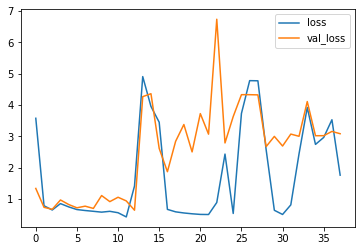

In [47]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [48]:
predictions = model.predict_classes(test)

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(test_target, predictions)

array([[33, 17],
       [19, 35]], dtype=int64)

# TRY6

In [63]:
seq_len

60

In [64]:
train.shape, test.shape

((106, 60, 4), (104, 60, 4))

In [65]:
model = Sequential()
model.add(LSTM(100, input_shape=(seq_len, 4)))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100)               42000     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 52,201
Trainable params: 52,201
Non-trainable params: 0
_________________________________________________________________


In [67]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=20)

In [68]:
adam = Adam(lr=0.01)
chk = ModelCheckpoint('best_model', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(train, train_target, epochs=600, batch_size=32, callbacks=[early_stop], validation_data=(validation,validation_target))

Epoch 1/600
4/4 [==============================] - 0s 108ms/step - loss: 0.7036 - accuracy: 0.4906 - val_loss: 0.7019 - val_accuracy: 0.5288
Epoch 2/600
4/4 [==============================] - 0s 31ms/step - loss: 0.6514 - accuracy: 0.5566 - val_loss: 0.9807 - val_accuracy: 0.5385
Epoch 3/600
4/4 [==============================] - 0s 29ms/step - loss: 0.5658 - accuracy: 0.6887 - val_loss: 2.3561 - val_accuracy: 0.6154
Epoch 4/600
4/4 [==============================] - 0s 30ms/step - loss: 0.7006 - accuracy: 0.7547 - val_loss: 0.8485 - val_accuracy: 0.5962
Epoch 5/600
4/4 [==============================] - 0s 31ms/step - loss: 0.5856 - accuracy: 0.7453 - val_loss: 1.1787 - val_accuracy: 0.5385
Epoch 6/600
4/4 [==============================] - 0s 32ms/step - loss: 0.5634 - accuracy: 0.7358 - val_loss: 0.6203 - val_accuracy: 0.7019
Epoch 7/600
4/4 [==============================] - 0s 30ms/step - loss: 0.5598 - accuracy: 0.7547 - val_loss: 0.6719 - val_accuracy: 0.5962
Epoch 8/600
4/4 [==

In [69]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

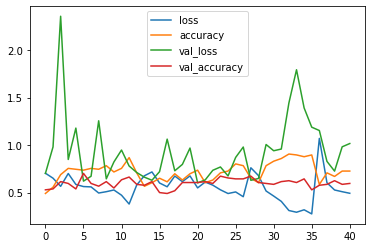

In [70]:
losses.plot()

In [71]:
predictions=model.predict_classes(test)

In [72]:
predictions

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
    

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
confusion_matrix(test_target, predictions)

array([[33, 17],
       [28, 26]], dtype=int64)

In [75]:
test1=test[0]

In [76]:
single_test=test1.reshape(1,60,4)

In [77]:
model.predict_classes(single_test)

array([[0]])